In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
df['Species'] = encoder.fit_transform(df['Species'])

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [7]:
df = df.drop(['Id'],axis=1)

In [8]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [9]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

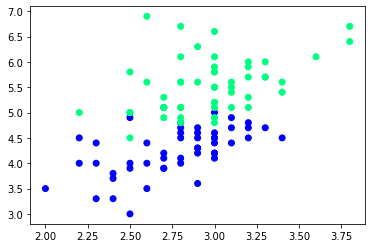

In [11]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [12]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
68,2.2,4.5,1
51,3.2,4.5,1
97,2.9,4.3,1
106,2.5,4.5,2
104,3.0,5.8,2
109,3.6,6.1,2
89,2.5,4.0,1
63,2.9,4.7,1
58,2.9,4.6,1
77,3.0,5.0,1


In [13]:
# taking onlu 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [14]:
df_val

,SepalWidthCm,PetalLengthCm,Species
135,3.0,6.1,2
97,2.9,4.3,1
124,3.3,5.7,2
125,3.2,6.0,2
66,3.0,4.5,1


In [15]:
df_test

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
136,3.4,5.6,2
148,3.4,5.4,2
86,3.1,4.7,1
87,2.3,4.4,1


In [16]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [17]:
x_test

array([[3. , 6.1],
       [2.9, 4.3],
       [3.3, 5.7],
       [3.2, 6. ],
       [3. , 4.5]])

In [18]:
y_test

array([2, 1, 2, 2, 1])

# Case 1- Bagging

In [19]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

x = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [20]:
df_bag

,SepalWidthCm,PetalLengthCm,Species
129,3.0,5.8,2
118,2.6,6.9,2
142,2.7,5.1,2
129,3.0,5.8,2
129,3.0,5.8,2
147,3.0,5.2,2
118,2.6,6.9,2
147,3.0,5.2,2


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [22]:
dt_bag1 = DecisionTreeClassifier()

In [23]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

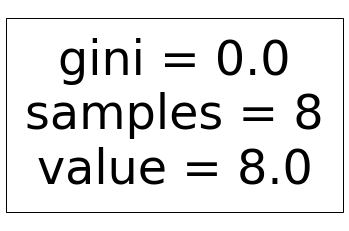

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\plotting\decision_regions.py:269: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)
C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


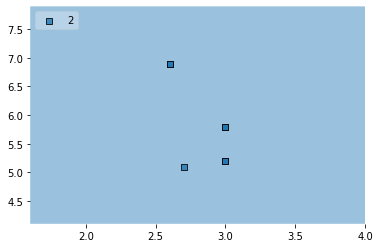

In [24]:
evaluate(dt_bag1,x,y)

In [25]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
65,3.1,4.4,1
147,3.0,5.2,2
116,3.0,5.5,2
129,3.0,5.8,2
118,2.6,6.9,2
147,3.0,5.2,2
118,2.6,6.9,2
65,3.1,4.4,1


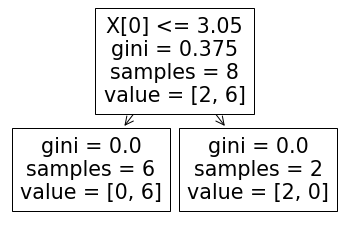

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.2


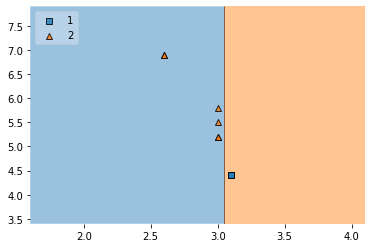

In [26]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [27]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
118,2.6,6.9,2
116,3.0,5.5,2
147,3.0,5.2,2
65,3.1,4.4,1
131,3.8,6.4,2
147,3.0,5.2,2
116,3.0,5.5,2
69,2.5,3.9,1


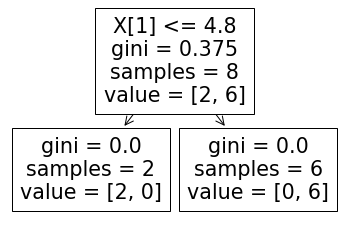

C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


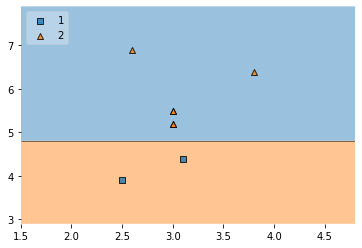

In [28]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Predict

In [29]:
df_test

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
136,3.4,5.6,2
148,3.4,5.4,2
86,3.1,4.7,1
87,2.3,4.4,1


In [30]:
print("Predictor 1",dt_bag1.predict(np.array([3.1,4.4]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.1,4.4]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.1,4.4]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [1]


C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [31]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
116,3.0,5.5,2
69,2.5,3.9,1
101,2.7,5.1,2
118,2.6,6.9,2
117,3.8,6.7,2
131,3.8,6.4,2
142,2.7,5.1,2
147,3.0,5.2,2
65,3.1,4.4,1
129,3.0,5.8,2


In [32]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
117,3.8,6.7,2
118,2.6,6.9,2
116,3.0,5.5,2
142,2.7,5.1,2
131,3.8,6.4,2
147,3.0,5.2,2
129,3.0,5.8,2
65,3.1,4.4,1


# Random Subspaces

In [33]:
# Column sampling.
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [34]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,144,6.8,3.2,5.9,2.3,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
24,25,4.8,3.4,1.9,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [35]:
df1.sample(2,replace=True,axis=1)
#          column sampling

,SepalLengthCm,Species
143,6.8,Iris-virginica
112,6.8,Iris-virginica
96,5.7,Iris-versicolor
58,6.6,Iris-versicolor
17,5.1,Iris-setosa
99,5.7,Iris-versicolor
92,5.8,Iris-versicolor
24,4.8,Iris-setosa
6,4.6,Iris-setosa
59,5.2,Iris-versicolor


# Random Patches

In [36]:
# Row sampling and column sampling
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
143,144,6.8,3.2,5.9,2.3,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
17,18,5.1,3.5,1.4,0.3,Iris-setosa
99,100,5.7,2.8,4.1,1.3,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
24,25,4.8,3.4,1.9,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


In [37]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)
#          row sampling           column sampling

,PetalLengthCm,PetalLengthCm
143,5.9,5.9
24,1.9,1.9
6,1.4,1.4
99,4.1,4.1
24,1.9,1.9
96,4.2,4.2
143,5.9,5.9
6,1.4,1.4


In [38]:
# The End.